In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from glob import glob

In [69]:
# Load numpy zip
data = np.load('Dataset/data_1000_norm.npz',allow_pickle=True)

In [70]:
X = data['arr_0'] # independent features
y = data['arr_1'] # target values

In [71]:
X.shape, y.shape

((440, 10000), (440,))

# Eigen Image


In [121]:
X1 = X - X.mean(axis=0)


In [122]:
from sklearn.decomposition import PCA

In [123]:
pca = PCA(n_components=None,whiten=True,svd_solver='auto')


In [124]:
x_pca = pca.fit_transform(X1)

In [125]:
x_pca.shape

(440, 440)

In [77]:
eigen_ratio = pca.explained_variance_ratio_
eigen_ratio_cum = np.cumsum(eigen_ratio)

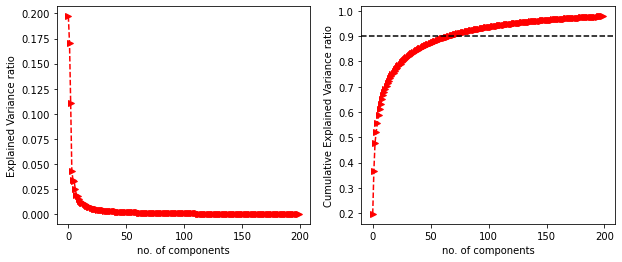

In [97]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(eigen_ratio[:200], 'r>--')
plt.xlabel('no. of components')
plt.ylabel('Explained Variance ratio')

plt.subplot(1,2,2)

plt.plot(eigen_ratio_cum[:200], 'r>--')
plt.xlabel('no. of components')
plt.ylabel('Cumulative Explained Variance ratio')
plt.axhline(y = 0.9, color='k', linestyle='--', label = '95% Explained Variance')

plt.show()

- Fig 1. Consider 1 component will give the 20% - 17.5% - 12.5% Explained variance ratio => Then n components will give the approximately 0%
- Fig 2. Consider 2 component nearly 40%mm 50 components nearly 80%
Conclusion: using elbow method, consider number of component is between 25 and 30 
> Since if I consider component between 25 to 30 the explained variance is around 75% so, in order to get min 80% variance I am considering 50 components. 

In [126]:
pca_50 = PCA(n_components=150,whiten=True)
x_pca_50 = pca_50.fit_transform(X1)
# pca_new = PCA(0.9)
# x_pca_50 = pca_new.fit_transform(X1)

In [127]:
x_pca_50.shape

(440, 150)

In [128]:
# saving pca
import pickle

In [130]:
pickle.dump(pca_50,open('model/pca_50.pickle','wb'))
# pickle.dump(pca_new,open('model/pca_50.pickle','wb'))

In [131]:
# consider 50 components and inverse transform
x_pca_inv = pca_50.inverse_transform(x_pca_50)
# x_pca_inv = pca_new.inverse_transform(x_pca_50)

In [132]:
x_pca_inv.shape

(440, 10000)

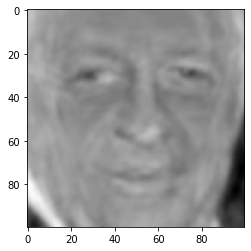

In [133]:
# consider 1 image
eig_img = x_pca_inv[0,:]
eig_img = eig_img.reshape((100,100))
plt.imshow(eig_img,cmap='gray')

In [134]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,

In [135]:
# saving
np.savez('Dataset/data_pca_50_y_mean.pickle',x_pca_50,y,X.mean())